In [ ]:
from pathlib import Path
from netCDF4 import Dataset
import wrf
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
wrfdata = Path.home() / "Projects/dyndowndata/Icestorm2021/" 
plevels = [200, 300, 500, 700, 850, 925, 1000]

testfile = wrfdata / "wrf_d01" / "wrfout_d01_2021-12-25_18:00:00"


In [ ]:
with Dataset(testfile) as ncfile:
    T = wrf.getvar(ncfile, "tk", timeidx=wrf.ALL_TIMES)
    T_out = wrf.vinterp(ncfile,
               field=T,
               vert_coord="p",
               interp_levels=plevels,
               timeidx=wrf.ALL_TIMES,
               extrapolate=True,
               field_type="tk",
               log_p=True)
T_out

<xarray.DataArray 'temp' (Time: 6, interp_level: 7, south_north: 204,
                          west_east: 264)>
array([[[[210.61766, 210.60925, 210.60944, ..., 220.1512 , 220.30748,
          220.51822],
         [210.5949 , 210.59088, 210.58852, ..., 220.1434 , 220.49965,
          220.6301 ],
         [210.57585, 210.5751 , 210.57434, ..., 220.52454, 220.73563,
          220.75566],
         ...,
         [222.046  , 222.00203, 221.95145, ..., 212.68205, 212.47067,
          212.32562],
         [221.96425, 221.90907, 221.86777, ..., 212.63884, 212.44336,
          212.2794 ],
         [221.88397, 221.83844, 221.7921 , ..., 212.57085, 212.40454,
          212.23715]],

        [[234.69862, 234.61899, 234.54056, ..., 222.23007, 222.44325,
          222.69516],
         [234.69914, 234.60632, 234.51971, ..., 222.96906, 223.14836,
          222.71399],
         [234.6931 , 234.601  , 234.51326, ..., 222.93364, 223.02988,
          222.73003],
...
         [249.42546, 249.12776, 248.98007, ..., 248.96674, 249.10527,
          249.2752 ],
         [249.351  , 249.35559, 249.13081, ..., 248.93956, 249.089  ,
          249.25636],
         [249.52272, 249.27759, 248.8349 , ..., 248.90887, 249.0666 ,
          249.22415]],

        [[282.97333, 282.9401 , 282.8948 , ..., 270.3219 , 270.2804 ,
          270.23096],
         [282.92313, 282.8901 , 282.84848, ..., 269.928  , 269.91125,
          270.00192],
         [282.87155, 282.8381 , 282.78223, ..., 269.61948, 269.6705 ,
          269.78098],
         ...,
         [241.16226, 241.85748, 243.49901, ..., 245.64911, 246.33643,
          246.16972],
         [241.04733, 241.0802 , 241.92137, ..., 245.5263 , 245.54735,
          245.65163],
         [240.86179, 241.31322, 241.42496, ..., 246.05415, 245.81061,
          245.5424 ]]]], dtype=float32)
Coordinates:
    XLONG         (south_north, west_east) float32 -174.4 -174.2 ... -108.3
    XLAT          (south_north, west_east) float32 50.55 50.59 ... 69.67 69.59
    XTIME         (Time) float32 1.44e+03 1.5e+03 1.56e+03 ... 1.68e+03 1.74e+03
  * Time          (Time) datetime64[ns] 2021-12-25T18:00:00 ... 2021-12-25T23...
  * interp_level  (interp_level) int64 200 300 500 700 850 925 1000
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       temperature
    units:             K
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        PolarStereographic(stand_lon=-152.0, moad_cen_lat=63.9...
    vert_interp_type:  p

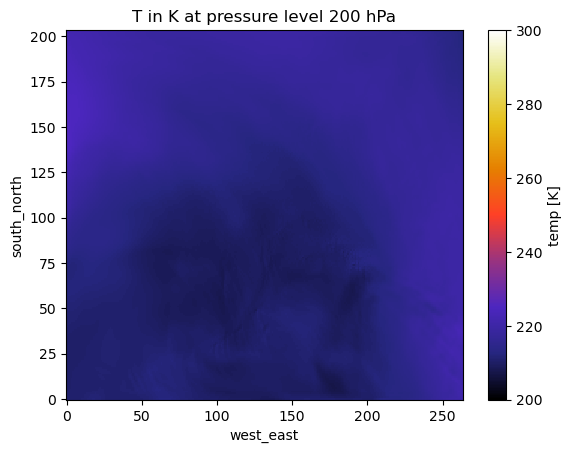

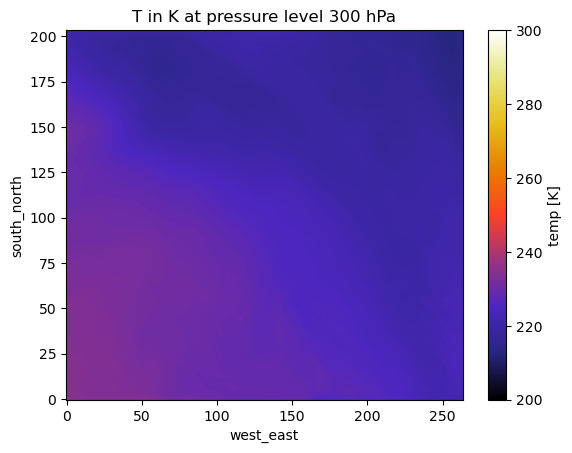

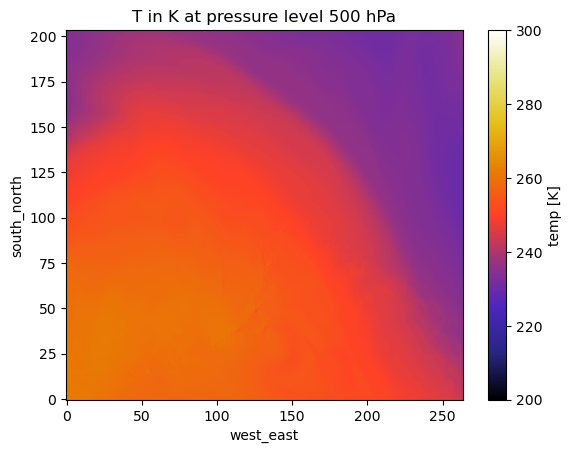

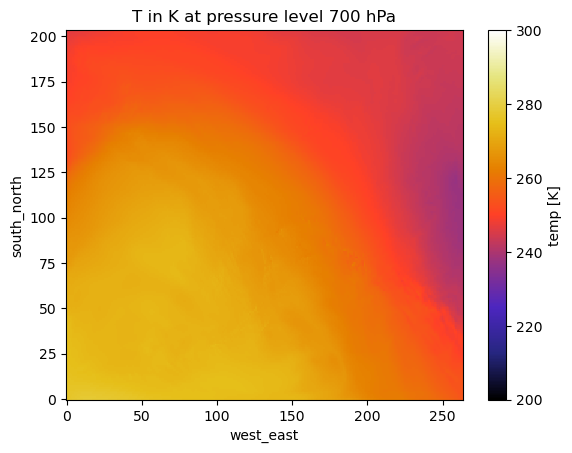

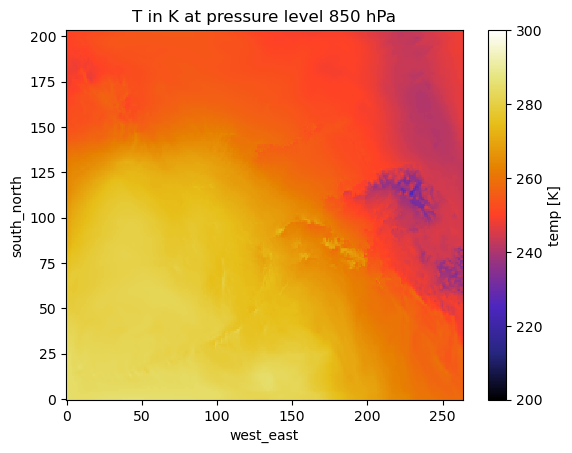

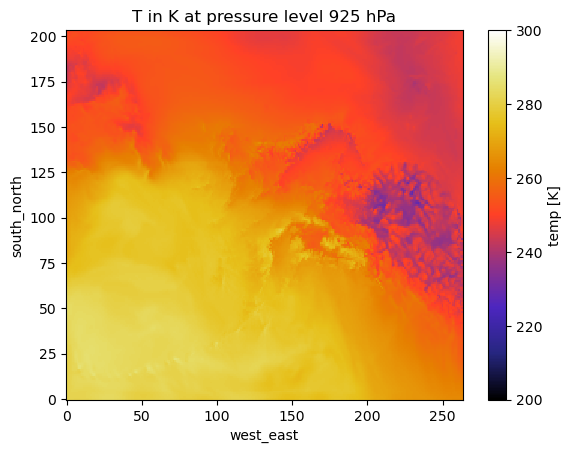

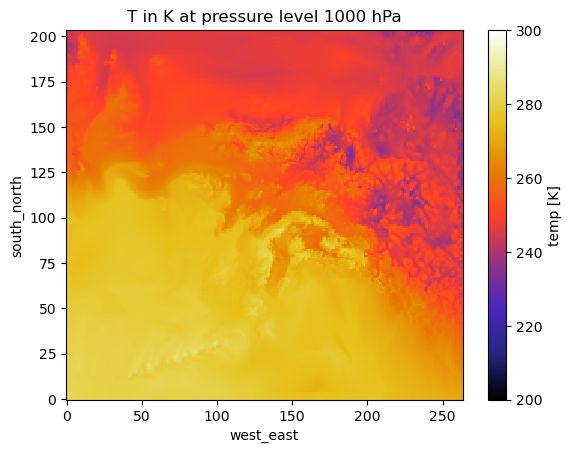

In [ ]:
for plevel in plevels:
    T_out.isel(Time=0).sel(interp_level=plevel).plot(
        vmin=200, vmax=300, cmap='CMRmap')
    plt.title(f"T in K at pressure level {plevel} hPa")
    plt.show()

In [ ]:
with Dataset(testfile) as ncfile:
    cloud = wrf.getvar(ncfile, "CLDFRA", timeidx=wrf.ALL_TIMES)
    CLDFRAC_out = wrf.vinterp(ncfile,
               field=cloud,
               vert_coord="p",
               interp_levels=plevels,
               timeidx=wrf.ALL_TIMES,
               extrapolate=True,
               field_type=None,
               log_p=True)
CLDFRAC_out

<xarray.DataArray 'CLDFRA' (Time: 6, interp_level: 7, south_north: 204,
                            west_east: 264)>
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 1.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.02980993, 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.20705126, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 1.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)
Coordinates:
    XLONG         (south_north, west_east) float32 -174.4 -174.2 ... -108.3
    XLAT          (south_north, west_east) float32 50.55 50.59 ... 69.67 69.59
    XTIME         (Time) float32 1.44e+03 1.5e+03 1.56e+03 ... 1.68e+03 1.74e+03
  * Time          (Time) datetime64[ns] 2021-12-25T18:00:00 ... 2021-12-25T23...
  * interp_level  (interp_level) int64 200 300 500 700 850 925 1000
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       CLOUD FRACTION
    units:             
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        PolarStereographic(stand_lon=-152.0, moad_cen_lat=63.9...
    vert_interp_type:  p

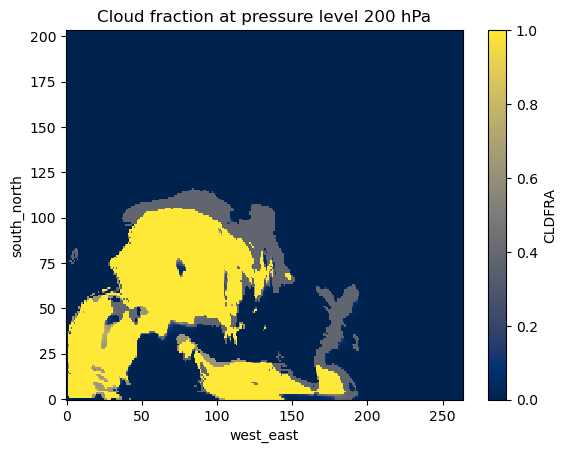

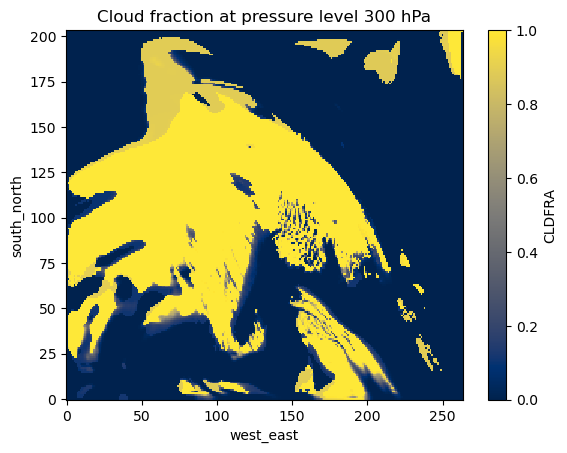

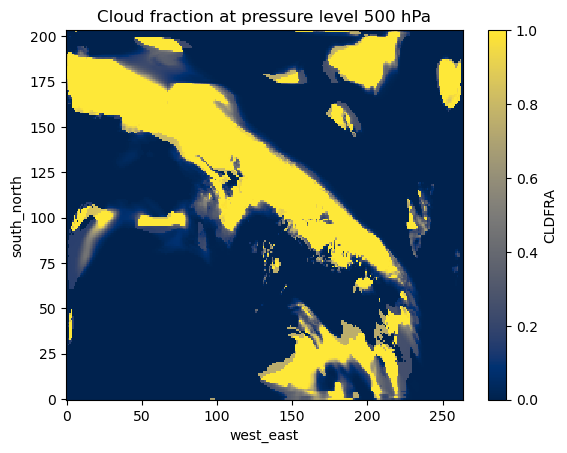

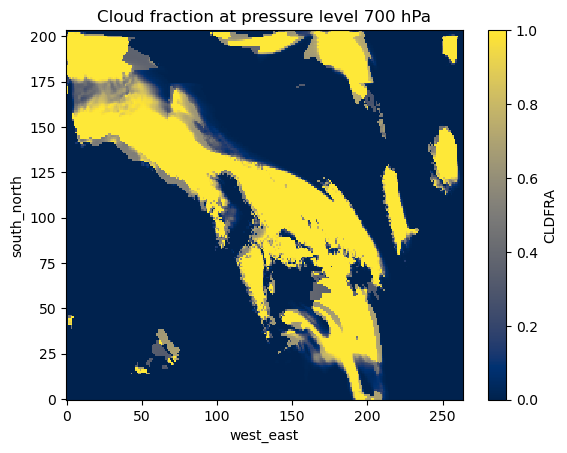

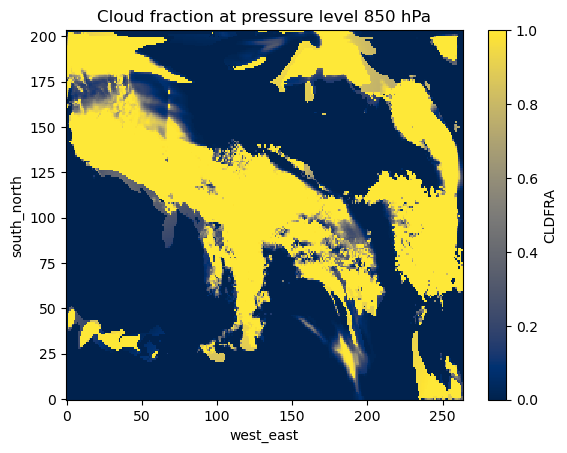

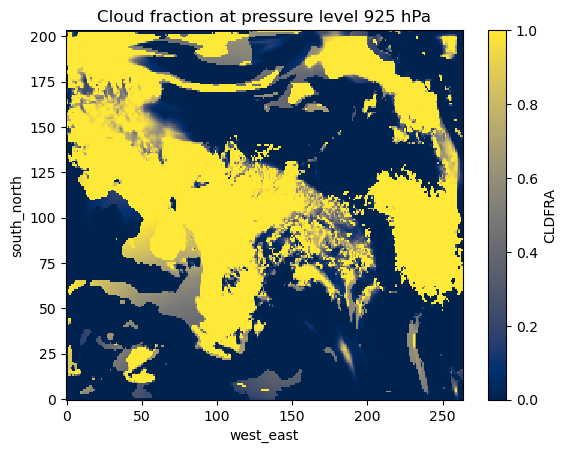

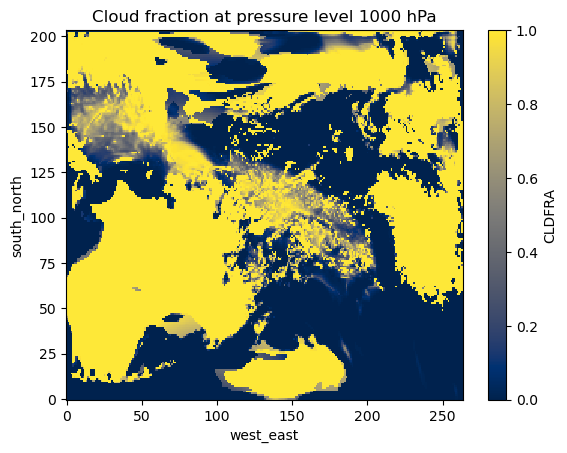

In [ ]:
for plevel in plevels:
    CLDFRAC_out.isel(Time=0).sel(interp_level=plevel).plot(
        cmap='cividis', )
    plt.title(f"Cloud fraction at pressure level {plevel} hPa")
    plt.show()

In [ ]:
merged = xr.merge([CLDFRAC_out.to_dataset(), T_out.to_dataset()])
merged.CLDFRA

<xarray.DataArray 'CLDFRA' (Time: 6, interp_level: 7, south_north: 204,
                            west_east: 264)>
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 1.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.02980993, 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.20705126, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 1.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 1.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)
Coordinates:
    XLONG         (south_north, west_east) float32 -174.4 -174.2 ... -108.3
    XLAT          (south_north, west_east) float32 50.55 50.59 ... 69.67 69.59
    XTIME         (Time) float32 1.44e+03 1.5e+03 1.56e+03 ... 1.68e+03 1.74e+03
  * Time          (Time) datetime64[ns] 2021-12-25T18:00:00 ... 2021-12-25T23...
  * interp_level  (interp_level) int64 200 300 500 700 850 925 1000
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       CLOUD FRACTION
    units:             
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        PolarStereographic(stand_lon=-152.0, moad_cen_lat=63.9...
    vert_interp_type:  p

In [ ]:
with Dataset(testfile) as ncfile:

    slp = wrf.getvar(ncfile, "slp", timeidx=wrf.ALL_TIMES)

In [ ]:
merged = xr.merge([CLDFRAC_out.to_dataset(), T_out.to_dataset(), slp.to_dataset()])
for var in merged.data_vars:
    # print(merged[var].attrs['projection'])
    merged[var].attrs['projection'] = str(merged[var].attrs['projection'])

In [ ]:
merged

<xarray.Dataset>
Dimensions:       (south_north: 204, west_east: 264, Time: 6, interp_level: 7)
Coordinates:
    XLONG         (south_north, west_east) float32 -174.4 -174.2 ... -108.3
    XLAT          (south_north, west_east) float32 50.55 50.59 ... 69.67 69.59
    XTIME         (Time) float32 1.44e+03 1.5e+03 1.56e+03 ... 1.68e+03 1.74e+03
  * Time          (Time) datetime64[ns] 2021-12-25T18:00:00 ... 2021-12-25T23...
  * interp_level  (interp_level) int64 200 300 500 700 850 925 1000
Dimensions without coordinates: south_north, west_east
Data variables:
    CLDFRA        (Time, interp_level, south_north, west_east) float32 0.0 .....
    temp          (Time, interp_level, south_north, west_east) float32 210.6 ...
    slp           (Time, south_north, west_east) float32 1.009e+03 ... 1.036e+03

In [ ]:
encoding = {
    var: {"zlib": True, "complevel": 4}
    for var in merged.data_vars
}
encoding

{'CLDFRA': {'zlib': True, 'complevel': 4},
 'temp': {'zlib': True, 'complevel': 4},
 'slp': {'zlib': True, 'complevel': 4}}

In [ ]:
merged.to_netcdf("testing123_wrf_d02.nc", engine="netcdf4", encoding=encoding)